# 1. 정형 데이터마이닝

###   1)  종속변수인 Chance_of_Admit과 독립변수('GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA')에 대해 피어슨 상관계수를 이용한 상관관계 분석을 수행하고 그래프를 이용하여 분석결과를 설명하시오.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.version

'3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]'

In [10]:
data = pd.read_csv('.\\Admission.csv')
data.columns = ['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE              400 non-null    int64  
 1   TOEFL            400 non-null    int64  
 2   Univ_Rating      400 non-null    int64  
 3   SOP              400 non-null    float64
 4   LOR              400 non-null    float64
 5   CGPA             400 non-null    float64
 6   Research         400 non-null    int64  
 7   Chance_of_Admit  400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


             corr to Chance_of_Admit        p-value
GRE                         0.802610   2.458112e-91
TOEFL                       0.791594   3.634102e-87
Univ_Rating                 0.711250   6.635019e-63
SOP                         0.675732   1.141095e-54
LOR                         0.669889   2.007315e-53
CGPA                        0.873289  2.336514e-126


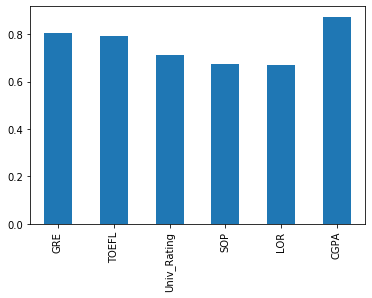

In [11]:
from scipy.stats import pearsonr


df_ret = pd.DataFrame(columns=['corr to Chance_of_Admit', 'p-value'])

for i in range(0, 6):
    corr, p = pearsonr(data.iloc[:,i], data['Chance_of_Admit'])
    df_ret.loc[data.columns[i]] = [corr, p]

print(df_ret)
    
df_ret['corr to Chance_of_Admit'].plot(kind='bar')
plt.show()

#### 1) 답안
<span style="color: blue">
'GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA' 각 특성의 Chance_of_Admit과의 적률상관계수는 <br/>
양의 상관이 있는 것을 나타난다. p-value 역시 모두 유의수준 0.001에서 유의한 것으로 나타나, <br/>
모상관계수를 0으로 봤을 때 표본의 상관계수가 모상관계수와 같다는 귀무가설을 기각할 수 있다.<br/>
이 중에서 CGPA가 0.87로 가장 상관관계의 정도가 크며, LOR이 0.67로 가장 작다.<br/>
</span>

###   2)  'GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research'가  Chance_of_Admit에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [13]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from itertools import combinations
from sklearn.preprocessing import StandardScaler

# Akaike's information Criteria(AIC)를 활용한 단계적 변수선택법을 수행하는 함수를 작성한다.
def stepwise_method(X, y):
    result = pd.DataFrame()
    feature_combis = []#변수 조합의 모든 경우의 수 
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()      # p개수 내림차순
    
    for j, feature_combi in enumerate(feature_combis):
        X_=X.filter(feature_combi)
        X_=sm.add_constant(X_)
        model = sm.OLS(y, X_)
        fitted = model.fit()
        n = fitted.nobs
        p = fitted.df_model
        if j==0:
            MSE_full = fitted.mse_resid          # Full모델의 MSE
        
        result.loc[j, 'feature_combi'] = ", ".join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = fitted.aic
        
        result = result.sort_values(by='AIC', ascending=True)
        best = result.iloc[0,0]
        
    return best, result

# 변수선택법을 적용하기 위해 설명변수와 목적변수를 X, y에 담아 스케일링을 적용한다.
cols_candidates = ['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research']
y = data.Chance_of_Admit
X = data[cols_candidates]

scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=cols_candidates)

# 변수선택법을 적용하여 최적의 설명변수 조합을 찾아낸다.
best, result = stepwise_method(X, y)

best_features = best.replace(' ', '').split(sep=',')
best_features.remove('const')

# 최적 설명변수 조합을 가지고 회귀분석을 시행한다.
X_best = X[best_features]
y = data.Chance_of_Admit

X_best=sm.add_constant(X_best)
model_best = sm.OLS(y, X_best)
fitted_best = model_best.fit()

print(fitted_best.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          2.04e-136
Time:                        19:46:05   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7244      0.003    227.276      0.0

#### 2) 답안
<span style="color: blue"><br/>
1) 단계적 분석법으로 변수 선택 <br/>
설명변수 'GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA' 'Research' 들과 목적변수 Chance_of_Admit에 대해,<br/> 
변수선택법을 통해 오차제곱합을 최소로 하는 설명변수 집합을 찾았고, 결과적으로 ['GRE', 'TOEFL', 'LOR', 'CGPA', 'Research'] 이다.<br/><br/> 
2) 회귀분석 수행<br/> 
[회귀분석 설명]<br/>
설명변수 집합 ['GRE', 'TOEFL', 'LOR', 'CGPA', 'Research']과 목적변수 Chance_of_Admit에 대해 회귀분석을 진행하였다.<br/>
[회귀계수의 추정]<br/>
GRE 특성의 회귀계수는 0.020로 추정되었으며, p-value는 0.05 유의수준에서 통계적으로 유의하고, 0이라는 영가설은 기각된다.<br/>
TOEFL 특성의 회귀계수는 0.018로 추정되었으며, p-value는 0.05 유의수준에서 통계적으로 유의하고, 0이라는 영가설은 기각된다.<br/>
LOR 특성의 회귀계수는 0.020로 추정되었으며, p-value는 0.001 유의수준에서 통계적으로 유의하고, 0이라는 영가설은 기각된다.<br/>
CGPA 특성의 회귀계수는 0.072로 추정되었으며, p-value는 0.001 유의수준에서 통계적으로 유의하고, 0이라는 영가설은 기각된다.<br/>
Research 특성의 회귀계수는 0.012로 추정되었으며, p-value는 0.05 유의수준에서 통계적으로 유의하고, 0이라는 영가설은 기각된다.<br/>
[모형에 대한 가설검정]<br/>
F검정으로 수행하며, 가설은 아래와 같이 수립된다.<br/>
귀무가설은 5개의 특성의 회귀계수는 모두 0이다 / 대립가설은 5개 특성의 회귀계수 중 적어도 하나는 0이 아니다.<br/>
F통계량은 320.6이 나왔고, p-value는 0.001 유의수준 하에서 통계적으로 유의하므로 모형은 통계적으로 타당하다.<br/>
[모형의 설명력]<br/>
R-squared 값은 0.803, Adjusted R-squared값은 0.80으로 대략 80% 수준에서 데이터에 대한 설명력을 갖는다고 볼 수 있다.<br/>
[도출된 모형]<br/>
도출된 회귀식은 0.7244 + 0.0204*GRE + 0.0184*TOEFL + 0.0204*LOR + 0.0721*CGPA + 0.0122*Research와 같다.<br/>
5개의 특성은 모두 Chance_of_Admit과 양의 상관관계를 가지며, 이 중에서도 CGPA의 영향력이 가장 크다고 볼 수 있다.<br/>
</span>

###   3)  단계선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 잔차분석을 수행하고, 그래프를 활용하여 결과를 해석하시오.

1. 정규성 확인
	Jarque-bera: stats 179.337, p-value 0.000
	왜도 : -1.157, 첨도 : 5.325


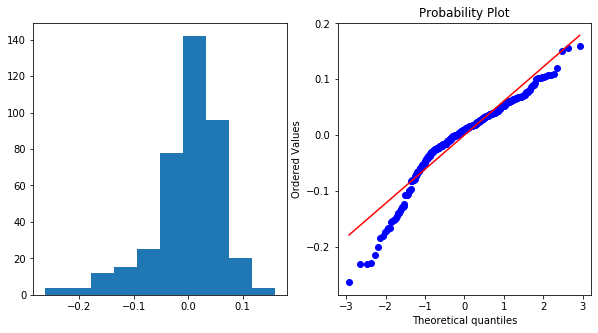

In [48]:

import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import zscore, probplot
import statsmodels.api as sm

# 최적 설명변수 조합을 가지고 회귀분석을 시행한다.
X_best = X[best_features]
y = data.Chance_of_Admit

X_best=sm.add_constant(X_best)
model_best = sm.OLS(y, X_best)
fitted_best = model_best.fit()

resid = fitted_best.resid      # 잔차
pred = fitted_best.fittedvalues     # 예측값
sresid = zscore(resid)   # 표준화잔차

stats, p, skew, kurt = jarque_bera(resid)

print('1. 정규성 확인')
print('\tJarque-bera: stats {:.3f}, p-value {:.3f}'.format(stats, p))
print('\t왜도 : {:.3f}, 첨도 : {:.3f}'.format(skew, kurt))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(resid)
probplot(resid, plot=ax[1])
plt.show()

2. 등분산성 가정 확인


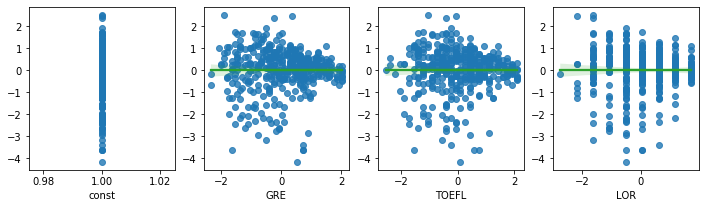

In [49]:
import seaborn as sns

print('2. 등분산성 가정 확인')
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for feature, ax in zip(X_best.columns, ax.ravel()):
    sns.regplot(x=X_best[feature], y=sresid, line_kws={'color':'C2'}, ax=ax)
plt.show()

In [51]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)
print('3. 독립성 가정 확인')
print(' Durbin-watson 통계량 {:.3f}'.format(dw))

3. 독립성 가정 확인
 Durbin-watson 통계량 0.750


#### 3) 답안
<span style='color:blue'>
[정규성 가정 확인]<br/>
정규성 가정은 Jarque-Bera (JB) 통계량을 사용한다. JB 검정에서 귀무가설은 정규성을 만족하는 것이다. <br/>
JB 검정에서 p-value가 유의수준 0.001에서 통계적으로 유의하므로 귀무가설이 기각된다. <br/>
즉 정규성을 만족하지 않는다.<br/>
[등분산성 가정 확인]<br/>    
seaborn regplot에서 각 독립변수의 잔차의 분산이 일정하면 가운데 회귀선이 수평하게 표시된다. <br/>
표준화 잔차의 값이 +/- 2를 벗어나면 이상값 또는 특이값을 예상할 수 있다.<br/>
모든 독립변수에서 잔차의 분산이 일정한 것으로 볼 수 있다.<br/>
[독립성 가정 확인]<br/>
독립성 가정 확인을 위해 Durbin-watson(DW) 통계량을 사용한다. <br/>
DW 통계량은 0 ~ 4의 값을 가지며 0으로 가까울수록 (잔차의) 양의 상관관계,4에 가까울수록 음의 상관관계, 2는 독립을 의미한다.<br/>
DW 통게량의 값이 1.5~2.5 사이의 값을 가지는 것이 적절한데 0.75로 어느 정도 양의 자기상관을 가지고 있다고 볼 수 있다.<br/>
<span/>

# 1. 정형 데이터마이닝

###   1)  cabin, embarked 변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고 범주형 변수가 NA인 값을 최빈값으로 대체하고 age 변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

In [154]:
import pandas as pd

data = pd.read_csv('titanic.csv')
df = data.copy()

data[:10]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C


In [156]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [155]:
# 1. cabin, embarked 값 중 ""로 처리된 값을 NA로 바꾼다.
df.cabin = df.cabin.fillna("NA")
df.embarked = df.embarked.fillna('NA')


# 2. 문자형 변수들을 character 형으로 바꾼다.
char_cols = ['name', 'ticket','cabin']
# DataFrame에서 상기 문자형 변수의 타입은 모두 object로 되어 있다. DataFrame에서 문자열형식을 object로 표현된다.


# 3. 범주형 변수들을 factor형으로 바꾼다.
category_cols = ['survived', 'sex', 'embarked']

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df.sex = le_sex.fit_transform(df.sex)
print(le_sex.classes_)

le_emb = LabelEncoder()
df.embarked = le_emb.fit_transform(df.embarked)
print(le_emb.classes_)


# 4. 수치형 변수인데 값이 NA인 경우 중앙값으로 대체한다.
num_cols = ['pclass','age','sibsp','parch','fare']
for col in num_cols:
    print('col : ',df[col].isnull().sum())
    df[col].fillna(df[col].median(), inplace=True)

    
# 5. 범주형 변수인데 값이 NA인 경우 최빈값으로 대체한다.
category_cols = ['survived', 'sex', 'embarked']

for col in category_cols:
    print('col : ',df[col].isnull().sum())
    df[col].fillna(df[col].mode()[0], inplace=True)

# 6. age변수를 표와 같이 구간화하여 age_1이라는 특성으로 추가한다.
df.age = pd.cut(df.age, bins=[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0], labels=[0,1,2,3,4,5,6,7,8])
df.age.value_counts()

['female' 'male']
['C' 'NA' 'Q' 'S']
col :  0
col :  263
col :  0
col :  0
col :  1
col :  0
col :  0
col :  0


2    624
3    210
1    162
4    132
0     86
5     62
6     27
7      6
8      0
Name: age, dtype: int64

###   2)  전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set.seed(12345) 실행 후 데이터 분할) 또 train 데이터로 종속변수인 survived(생존여부)를 독립변수 'pclass',  'sex', 'sibsp', 'parch', 'fare', 'embarked' 로지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.
       

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

X = df[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']].copy()
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=1234)

model_rf = RandomForestClassifier(n_estimators=50, random_state=0)
model_gb = GradientBoostingClassifier(n_estimators=50, random_state=0)
model_ab = AdaBoostClassifier(n_estimators=50, random_state=0)

models = [model_rf, model_gb, model_ab]
model_names = ['RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier']

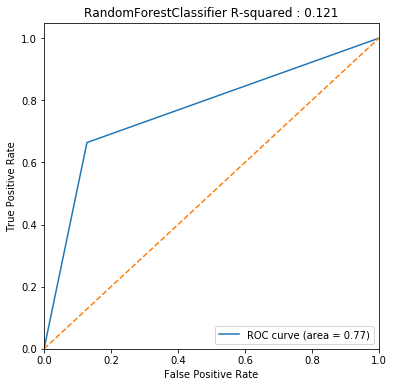

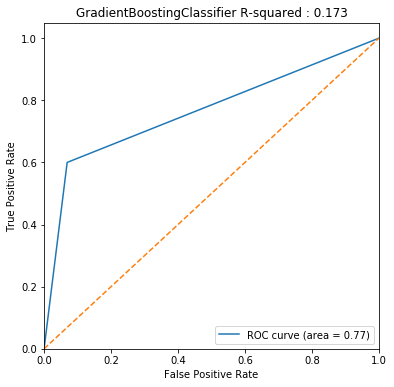

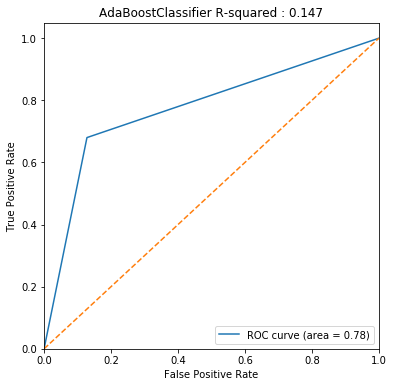

In [209]:
def evaluateModel(models, model_names):
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model_name+' R-squared : {:.3f}'.format(round(r2_score(y_test, pred), 3)))
        plt.legend(loc="lower right")
        
evaluateModel(models, model_names)